# Importando Bibliotecas utilizadas no projeto

In [20]:
import pandas as pd
import plotly.express as px  
import plotly.graph_objects as go

import dash 
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# Convertendo o aruivo CSV em um DataFrame

In [11]:
df = pd.read_csv('sales_data_sample.csv', encoding='Latin1')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [12]:
usa_df = df.loc[df['COUNTRY'] == 'USA']
usa_df['Data Pedido'] = pd.to_datetime(usa_df['ORDERDATE'])
usa_df['Ano'] = usa_df['Data Pedido'].dt.year
usa_df['Mes'] = usa_df['Data Pedido'].dt.month_name()
usa_df.loc[usa_df['Ano'] == 2003, 'Ano'] = 2019
usa_df.loc[usa_df['YEAR_ID'] == 2003, 'YEAR_ID'] = 2019 
usa_df.loc[usa_df['Ano'] == 2004, 'Ano'] = 2020
usa_df.loc[usa_df['YEAR_ID'] == 2004, 'YEAR_ID'] = 2020
usa_df.loc[usa_df['Ano'] == 2005, 'Ano'] = 2021
usa_df.loc[usa_df['YEAR_ID'] == 2005, 'YEAR_ID'] = 2021
usa_df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Data Pedido,Ano,Mes
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2019,...,NY,10022,USA,NaN,Yu,Kwai,Small,2003-02-24,2019,February
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2019,...,CA,90003,USA,NaN,Young,Julie,Medium,2003-08-25,2019,August
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2019,...,CA,NaN,USA,NaN,Brown,Julie,Medium,2003-10-10,2019,October
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2019,...,CA,94217,USA,NaN,Hirano,Juri,Medium,2003-10-28,2019,October
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2019,...,CA,NaN,USA,NaN,Murphy,Julie,Small,2003-12-01,2019,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,10185,28,64.43,6,1804.04,11/14/2003 0:00,Shipped,4,11,2019,...,MA,50553,USA,NaN,Tam,Wing C,Small,2003-11-14,2019,November
2807,10222,36,63.34,18,2280.24,2/19/2004 0:00,Shipped,1,2,2020,...,CA,91217,USA,NaN,Thompson,Valarie,Small,2004-02-19,2020,February
2809,10248,23,65.52,9,1506.96,5/7/2004 0:00,Cancelled,2,5,2020,...,NY,10022,USA,NaN,Yu,Kwai,Small,2004-05-07,2020,May
2817,10337,42,97.16,5,4080.72,11/21/2004 0:00,Shipped,4,11,2020,...,NY,10022,USA,NaN,Hernandez,Maria,Medium,2004-11-21,2020,November


In [13]:
usa_df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2         901
CITY                   0
STATE                  0
POSTALCODE            76
COUNTRY                0
TERRITORY           1004
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
Data Pedido            0
Ano                    0
Mes                    0
dtype: int64

# Filtrando as colunas que iremos utilizar no Projeto

In [14]:
drop_cols  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'TERRITORY', 'PHONE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
usa_df = usa_df.drop(drop_cols, axis = 1)


In [15]:
usa_df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CITY               0
STATE              0
COUNTRY            0
DEALSIZE           0
Data Pedido        0
Ano                0
Mes                0
dtype: int64

# Gerando o layout com os graficos com a biblioteca Dash

In [16]:
app = dash.Dash(__name__)

app.layout = html.Div([

    html.H1(id = 'output_title', children = [], style={'text-align': 'center'}  ),

    dcc.Dropdown(id="ano_selecionado",
                 options=[
                     {"label": "2019", "value": 2019},
                     {"label": "2020", "value": 2020},
                     {"label": "2021", "value": 2021}],
                 multi=False,
                 value=2019,
                 style={'width': "40%"}
                 ),              
                 
    html.Br(),
    html.Div(id='output_container', children=[]),       
    html.Br(),

    dcc.Graph(id='mapa_de_vendas', figure={})

])

In [17]:
@app.callback(
    [Output(component_id='output_container', component_property='children'),
    Output(component_id='output_title', component_property='children'),
    Output(component_id='mapa_de_vendas', component_property='figure')],
    [Input(component_id='ano_selecionado', component_property='value')]
    
)    

def update_graph(ano_selecionado):

    container = "O ano selecionado foi: {}".format(ano_selecionado)

    title = "Mapa de Vendas nos EUA no ano : {}".format(ano_selecionado)

    df_ = usa_df.copy()
    df_ = df_[df_["Ano"] == ano_selecionado]
    df_ = df_[df_["STATUS"] == "Shipped"]

    # # Plotly Express
    fig = px.choropleth(
        data_frame=df_,
        locationmode= 'USA-states',
        locations= 'STATE',
        scope="usa",
        color='SALES',
        hover_data = ['STATE', 'SALES'],
        color_continuous_scale=px.colors.sequential.YlOrRd,
        template='plotly_dark'
        

    )

    return container, title, fig 






In [18]:
if __name__ == "__main__":
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [05/May/2022 09:40:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2022 09:40:50] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2022 09:40:50] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2022 09:40:50] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [05/May/2022 09:40:50] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [05/May/2022 09:40:50] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [05/May/2022 09:40:50] "POST /_dash-update-component HTTP/1.1" 200 -


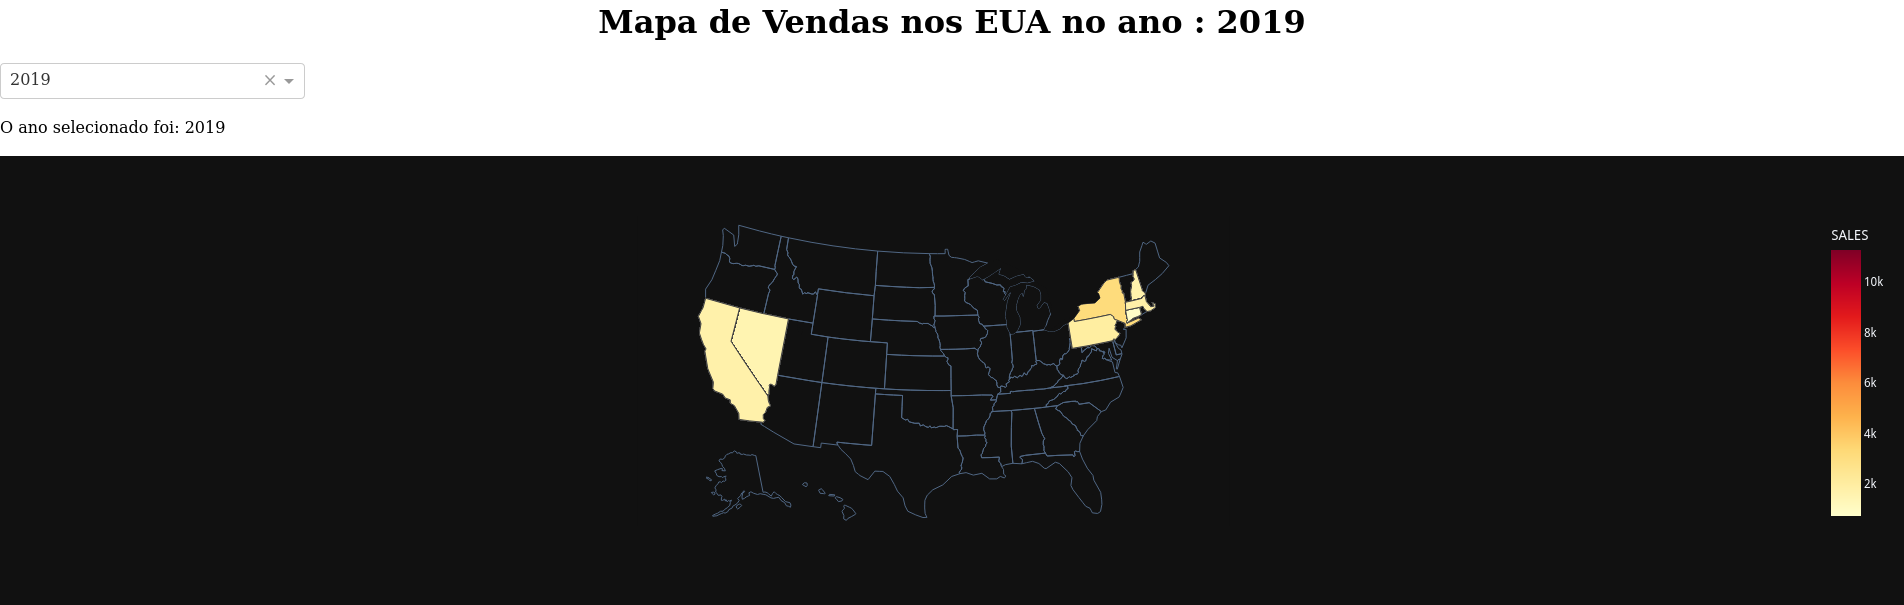

In [22]:
Image('Screenshot 2022-05-05 at 09-40-59 Dash.png')